In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# ----------------------------------------------------------------
# Helper function to load NDJSON and add token columns
# ----------------------------------------------------------------
def load_ndjson_to_df(filepath, model_name, reasoning_type):
    """
    Reads a NDJSON file line by line, returning a DataFrame.
    
    We assume these columns might appear:
      - prompt_token (int)
      - reasoning_token (int) or missing (if model doesn't have reasoning)
      - completion_token (int)
    
    We fill reasoning_token with NaN if it's not present (e.g., v3).
    """
    df = pd.read_json(filepath, lines=True)
    
    # If 'reasoning_token' is missing (like in v3), add it as NaN
    if "reasoning_token" not in df.columns:
        df["reasoning_token"] = np.nan

    # Tag the model + reasoning type
    df["model"] = model_name  # either "R1" or "V3"
    df["reasoning_format"] = reasoning_type  # either "long" or "short"
    return df

In [13]:

# # ----------------------------------------------------------------
# # 1) Load the four NDJSON files
# #    (Adjust the filenames to match your actual files)
# # ----------------------------------------------------------------
# df_d1_long  = load_ndjson_to_df("../../Outputs/GPT4Paper_Clusters/responses/prompts/r1_long/responses_long.ndjson",  "deepseekr1", "long")
# df_d1_short = load_ndjson_to_df("../../Outputs/GPT4Paper_Clusters/responses/prompts/r1_short/responses.ndjson", "deepseekr1", "short")
# df_d3_long  = load_ndjson_to_df("../../Outputs/GPT4Paper_Clusters/responses/prompts/v3_long/responses_long.ndjson",  "deepseekv3", "long")
# df_d3_short = load_ndjson_to_df("../../Outputs/GPT4Paper_Clusters/responses/prompts/v3_short/responses.ndjson", "deepseekv3", "short")

# # Combine everything
# df_all = pd.concat([df_d1_long, df_d1_short, df_d3_long, df_d3_short],
#                    ignore_index=True)


df_r1_long  = load_ndjson_to_df(
    "../../Outputs/GPT4Paper_Clusters/responses/prompts/r1_long/responses_long.ndjson",
    model_name="R1",
    reasoning_type="long"
)
df_r1_short = load_ndjson_to_df(
    "../../Outputs/GPT4Paper_Clusters/responses/prompts/r1_short/responses.ndjson",
    model_name="R1",
    reasoning_type="short"
)
df_v3_long  = load_ndjson_to_df(
    "../../Outputs/GPT4Paper_Clusters/responses/prompts/v3_long/responses_long.ndjson",
    model_name="V3",
    reasoning_type="long"
)
df_v3_short = load_ndjson_to_df(
    "../../Outputs/GPT4Paper_Clusters/responses/prompts/v3_short/responses.ndjson",
    model_name="V3",
    reasoning_type="short"
)

# Combine everything
df_all = pd.concat([df_r1_long, df_r1_short, df_v3_long, df_v3_short],
                   ignore_index=True)

/tmp/ipykernel_2225466/1596167671.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_reasoning, labels=labels_reasoning)


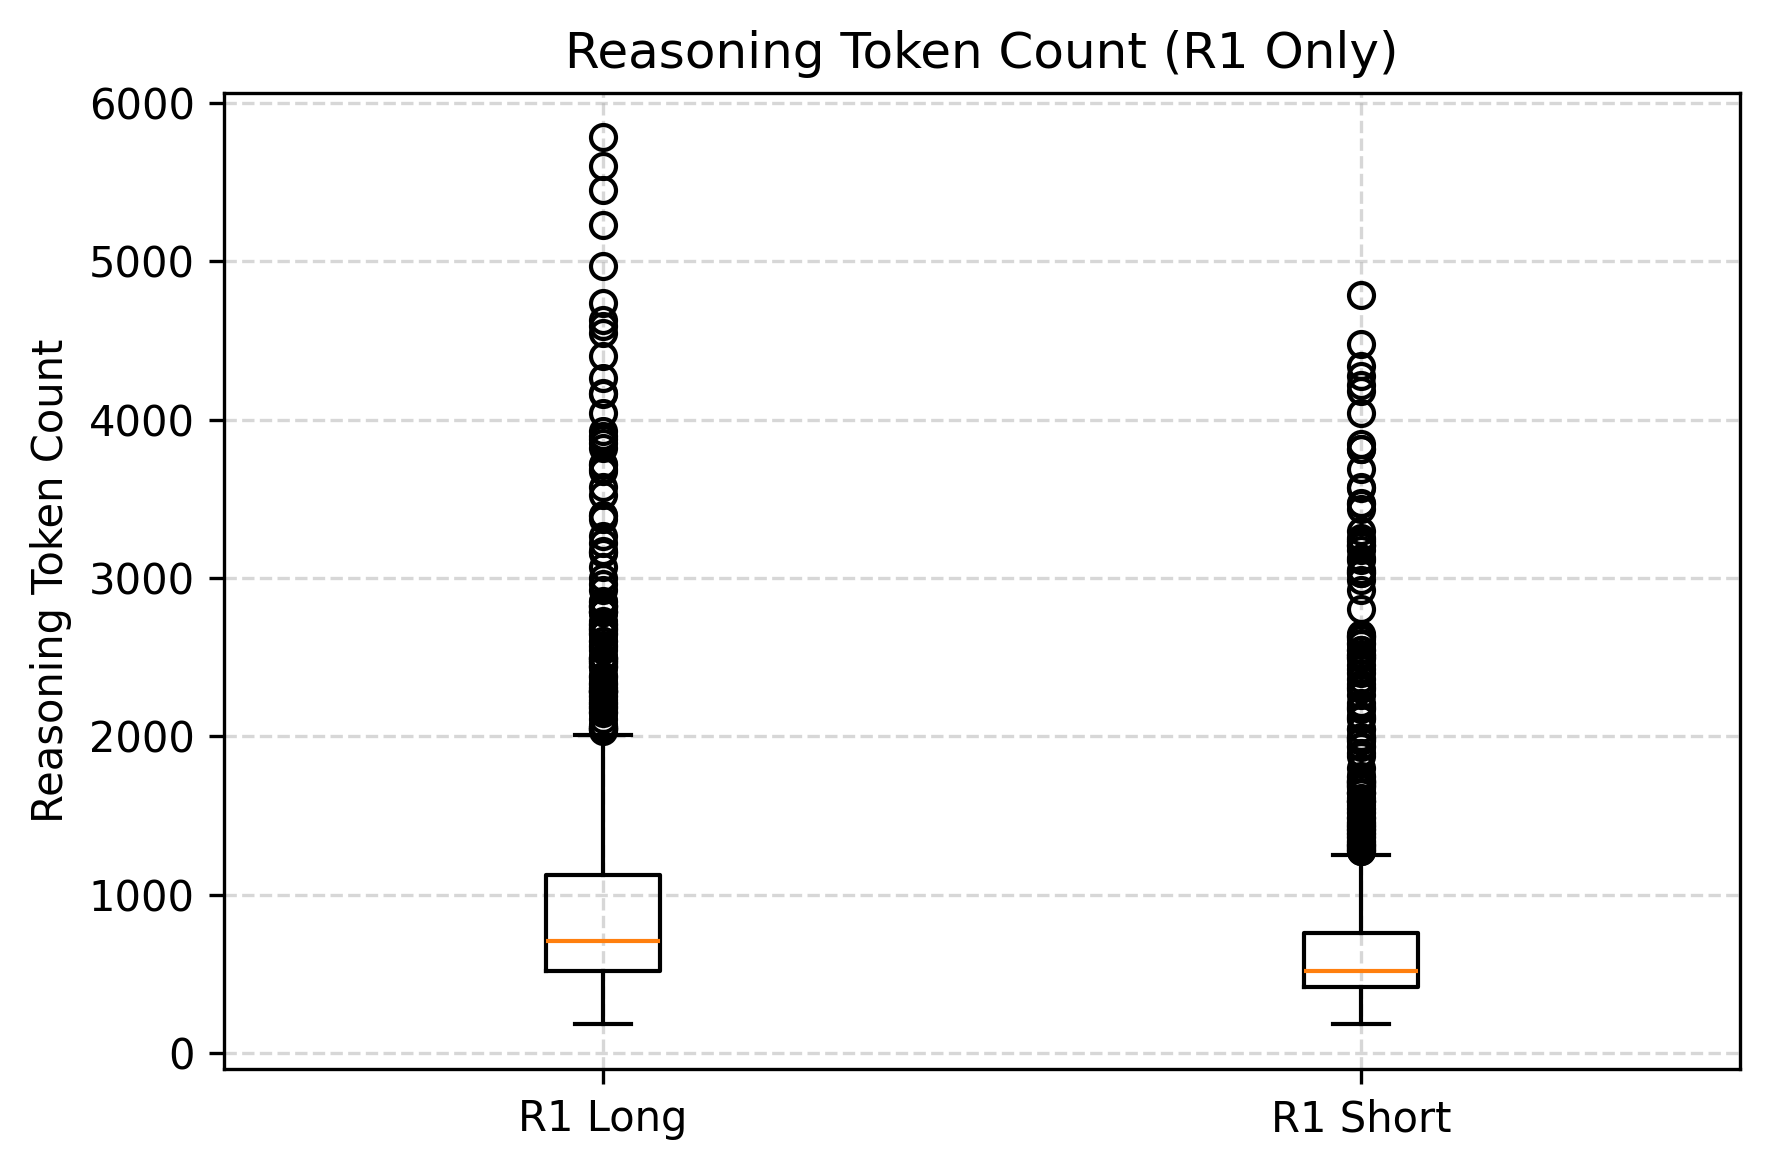

In [14]:
# --------------------------
# 2) Box Plot A: Reasoning Tokens (R1 only)
#    V3 has no reasoning => 'reasoning_token' is NaN for V3
# --------------------------
df_reasoning = df_all.loc[df_all["model"] == "R1"]
data_reasoning = [
    df_reasoning.loc[df_reasoning["reasoning_format"] == "long",  "reasoning_token"],
    df_reasoning.loc[df_reasoning["reasoning_format"] == "short", "reasoning_token"]
]
labels_reasoning = ["R1 Long", "R1 Short"]

plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(data_reasoning, labels=labels_reasoning)
plt.title("Reasoning Token Count (R1 Only)")
plt.ylabel("Reasoning Token Count")
plt.grid(True, which="major", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2225466/2913545498.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_completion, labels=labels_completion)


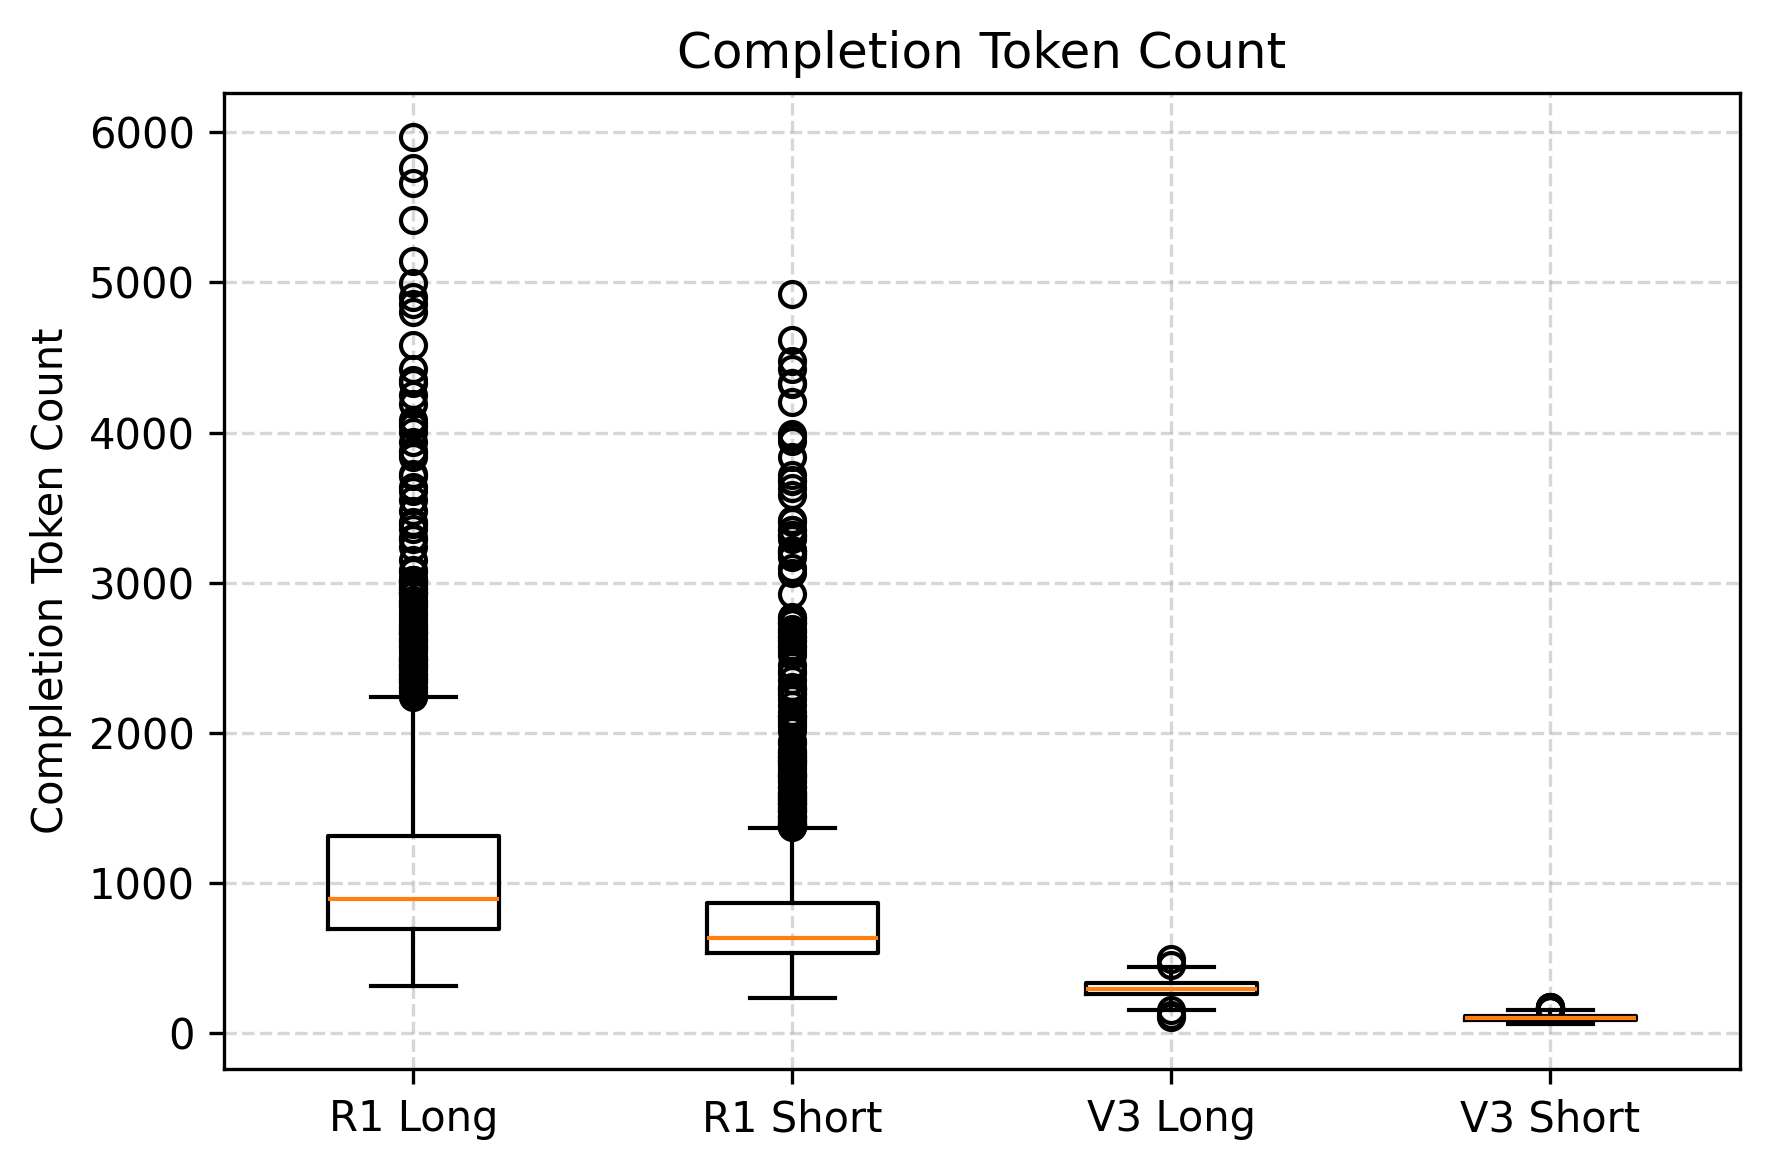

In [15]:
# --------------------------
# 3) Box Plot B: Completion Tokens (R1 + V3)
#    R1 (long/short) and V3 (long/short)
# --------------------------
data_completion = [
    df_all.loc[(df_all["model"] == "R1") & (df_all["reasoning_format"] == "long"),  "completion_token"],
    df_all.loc[(df_all["model"] == "R1") & (df_all["reasoning_format"] == "short"), "completion_token"],
    df_all.loc[(df_all["model"] == "V3") & (df_all["reasoning_format"] == "long"),  "completion_token"],
    df_all.loc[(df_all["model"] == "V3") & (df_all["reasoning_format"] == "short"), "completion_token"],
]
labels_completion = ["R1 Long", "R1 Short", "V3 Long", "V3 Short"]

plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(data_completion, labels=labels_completion)
plt.title("Completion Token Count")
plt.ylabel("Completion Token Count")
plt.grid(True, which="major", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()